<a href="https://colab.research.google.com/github/16shivani/sans/blob/master/SatelltieShivani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [2]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [4]:
# !kaggle datasets download -d mahmoudreda55/satellite-image-classification

100% 21.8M/21.8M [00:01<00:00, 6.83MB/s]



In [5]:
# !unzip *.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/cloudy/train_23598.jpg  
  inflating: data/cloudy/train_23608.jpg  
  inflating: data/cloudy/train_23634.jpg  
  inflating: data/cloudy/train_23636.jpg  
  inflating: data/cloudy/train_23646.jpg  
  inflating: data/cloudy/train_2366.jpg  
  inflating: data/cloudy/train_23664.jpg  
  inflating: data/cloudy/train_23706.jpg  
  inflating: data/cloudy/train_2380.jpg  
  inflating: data/cloudy/train_23805.jpg  
  inflating: data/cloudy/train_23806.jpg  
  inflating: data/cloudy/train_23826.jpg  
  inflating: data/cloudy/train_23843.jpg  
  inflating: data/cloudy/train_23877.jpg  
  inflating: data/cloudy/train_23884.jpg  
  inflating: data/cloudy/train_23953.jpg  
  inflating: data/cloudy/train_2396.jpg  
  inflating: data/cloudy/train_23978.jpg  
  inflating: data/cloudy/train_23979.jpg  
  inflating: data/cloudy/train_23980.jpg  
  inflating: data/cloudy/train_23981.jpg  
  inflating: data/cloudy/train_24001.jpg  
  infl

In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import random

In [7]:
Name = os.listdir("data")
print(Name)

['cloudy', 'desert', 'green_area', 'water']


In [8]:
N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

(50, 50, 3)


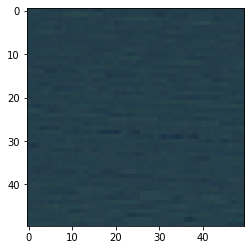

In [10]:
path0='data/green_area/Forest_1404.jpg'
image=cv2.imread(path0)
image2=np.resize(image,(50,50,3))
print(image2.shape)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

In [11]:
dataset=[]
dataname=[]
count=0
for name in tqdm(os.listdir("data")):
    path=os.path.join("data",name)
    for im in os.listdir(path):
        image=cv2.imread(os.path.join(path,im))
        image2=np.resize(image,(50,50,3))
        dataset+=[image2]
        dataname+=[count]
    count=count+1

len(dataset), len(dataname)

100%|██████████| 4/4 [00:17<00:00,  4.45s/it]


(5631, 5631)

In [12]:
data=np.array(dataset)
dataname=np.array(dataname)

In [13]:
data.shape

(5631, 50, 50, 3)

In [14]:
dataname.shape

(5631,)

In [15]:
print(pd.Series(dataname).value_counts())

3    1500
2    1500
0    1500
1    1131
dtype: int64


In [17]:
m=len(data)
M=list(range(m))
random.seed(42)
random.shuffle(M)

In [18]:
trainX=data[M[0:(m//4)*3]]
trainY0=dataname[M[0:(m//4)*3]]
testX=data[M[(m//4)*3:]]
testY0=dataname[M[(m//4)*3:]]

In [19]:
print(trainX.shape)
print(trainY0.shape)
print(testX.shape)
print(testY0.shape)

(4221, 50, 50, 3)
(4221,)
(1410, 50, 50, 3)
(1410,)


In [20]:
labels1=to_categorical(trainY0)
trainY=np.array(labels1)

In [21]:
trainx,testx,trainy,testy=train_test_split(trainX,trainY,test_size=0.2,random_state=42)

In [22]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(3376, 50, 50, 3)
(845, 50, 50, 3)
(3376, 4)
(845, 4)


In [23]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [24]:
base_model = tf.keras.applications.DenseNet201(input_shape=(50,50,3),include_top=False,weights='imagenet',pooling='avg')
base_model.trainable = False

74850304/74836368 [==============================] - 1s 0us/step


In [26]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

In [28]:
inputs = layers.Input(shape=(50, 50, 3), name="input_layer")
x = base_model(inputs, training=False) #Put the base model in inference mode, and so weights ehich remains frozen, remains frozen
x = layers.Dense(100, activation="relu")(x)
outputs = layers.Dense(len(Name), activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 50, 50, 3)]       0         
_________________________________________________________________
densenet201 (Functional)     (None, 1920)              18321984  
_________________________________________________________________
dense_1 (Dense)              (None, 100)               192100    
_________________________________________________________________
output_layer (Dense)         (None, 4)                 404       
Total params: 18,514,488
Trainable params: 192,504
Non-trainable params: 18,321,984
_________________________________________________________________


In [30]:
base_model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50, 50, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 56, 56, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 25, 25, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 25, 25, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [31]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
history=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=20)

Epoch 1/20
106/106 [==============================] - 58s 156ms/step - loss: 0.3497 - accuracy: 0.8848 - val_loss: 0.2081 - val_accuracy: 0.9314
Epoch 2/20
106/106 [==============================] - 9s 89ms/step - loss: 0.1767 - accuracy: 0.9405 - val_loss: 0.1634 - val_accuracy: 0.9503
Epoch 3/20
106/106 [==============================] - 9s 89ms/step - loss: 0.1421 - accuracy: 0.9517 - val_loss: 0.1648 - val_accuracy: 0.9515
Epoch 4/20
106/106 [==============================] - 10s 91ms/step - loss: 0.1177 - accuracy: 0.9597 - val_loss: 0.1515 - val_accuracy: 0.9491
Epoch 5/20
106/106 [==============================] - 11s 99ms/step - loss: 0.1181 - accuracy: 0.9612 - val_loss: 0.1209 - val_accuracy: 0.9609
Epoch 6/20
106/106 [==============================] - 9s 89ms/step - loss: 0.0996 - accuracy: 0.9650 - val_loss: 0.1083 - val_accuracy: 0.9657
Epoch 7/20
106/106 [==============================] - 10s 98ms/step - loss: 0.1000 - accuracy: 0.9683 - val_loss: 0.1374 - val_accuracy: 0

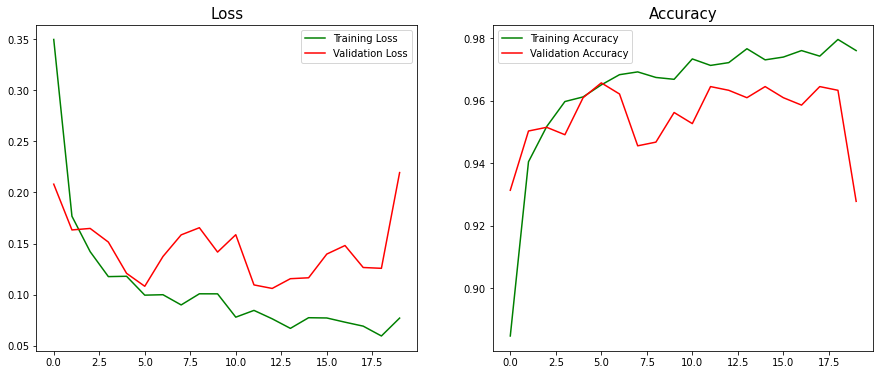

In [33]:
loss = history.history["loss"]
accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]

epochs = range(len(loss))

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(epochs, loss, label = "Training Loss", color='green')
plt.plot(epochs, val_loss, label = "Validation Loss", color='red')
plt.legend()
plt.title("Loss", fontsize=15)

plt.subplot(1,2,2)
plt.plot(epochs, accuracy, label = "Training Accuracy", color='green')
plt.plot(epochs, val_accuracy, label = "Validation Accuracy", color='red')
plt.legend()
plt.title("Accuracy", fontsize=15)
plt.show();

In [34]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       201
           1       0.88      0.99      0.93       159
           2       0.89      0.97      0.93       233
           3       0.97      0.87      0.92       252

    accuracy                           0.93       845
   macro avg       0.93      0.93      0.93       845
weighted avg       0.93      0.93      0.93       845



In [35]:
pred2=model.predict(testX)
print(pred2.shape)

PRED=[]
for item in pred2:
    value2=np.argmax(item)      
    PRED+=[value2]
print(pd.Series(PRED).value_counts())

(1410, 4)
2    404
0    349
3    330
1    327
dtype: int64


In [36]:
ANS=testY0
print(pd.Series(ANS).value_counts())
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

2    376
0    376
3    359
1    299
dtype: int64
0.9439716312056737


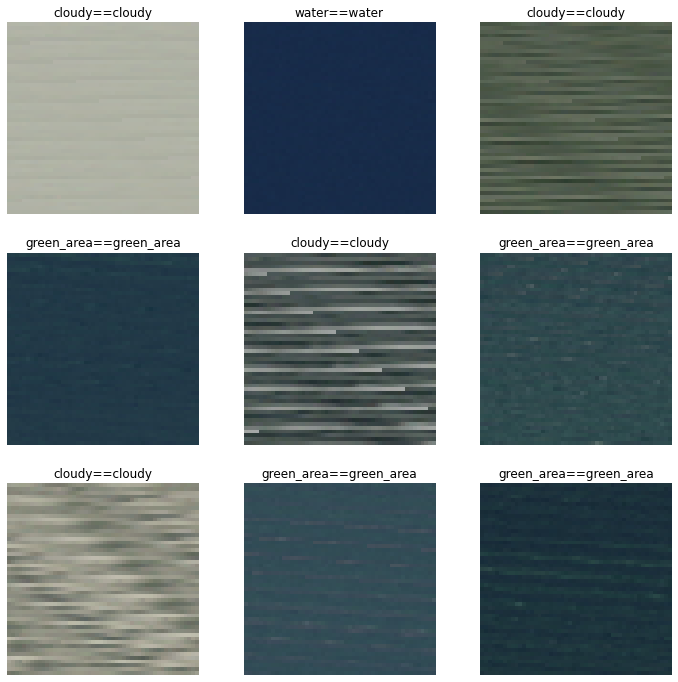

In [37]:
fig, axs = plt.subplots(3,3,figsize=(12,12))
for i in range(9):
    r=i//3
    c=i%3
    img1 = testX[i]
    ax=axs[r][c].axis("off")
    actual=reverse_mapping[testY0[i]]
    predict=reverse_mapping[PRED[i]]    
    ax=axs[r][c].set_title(actual+'=='+predict)
    ax=axs[r][c].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

In [38]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [42]:
class_names = Name
y_labels = ground
pred_classes = pred

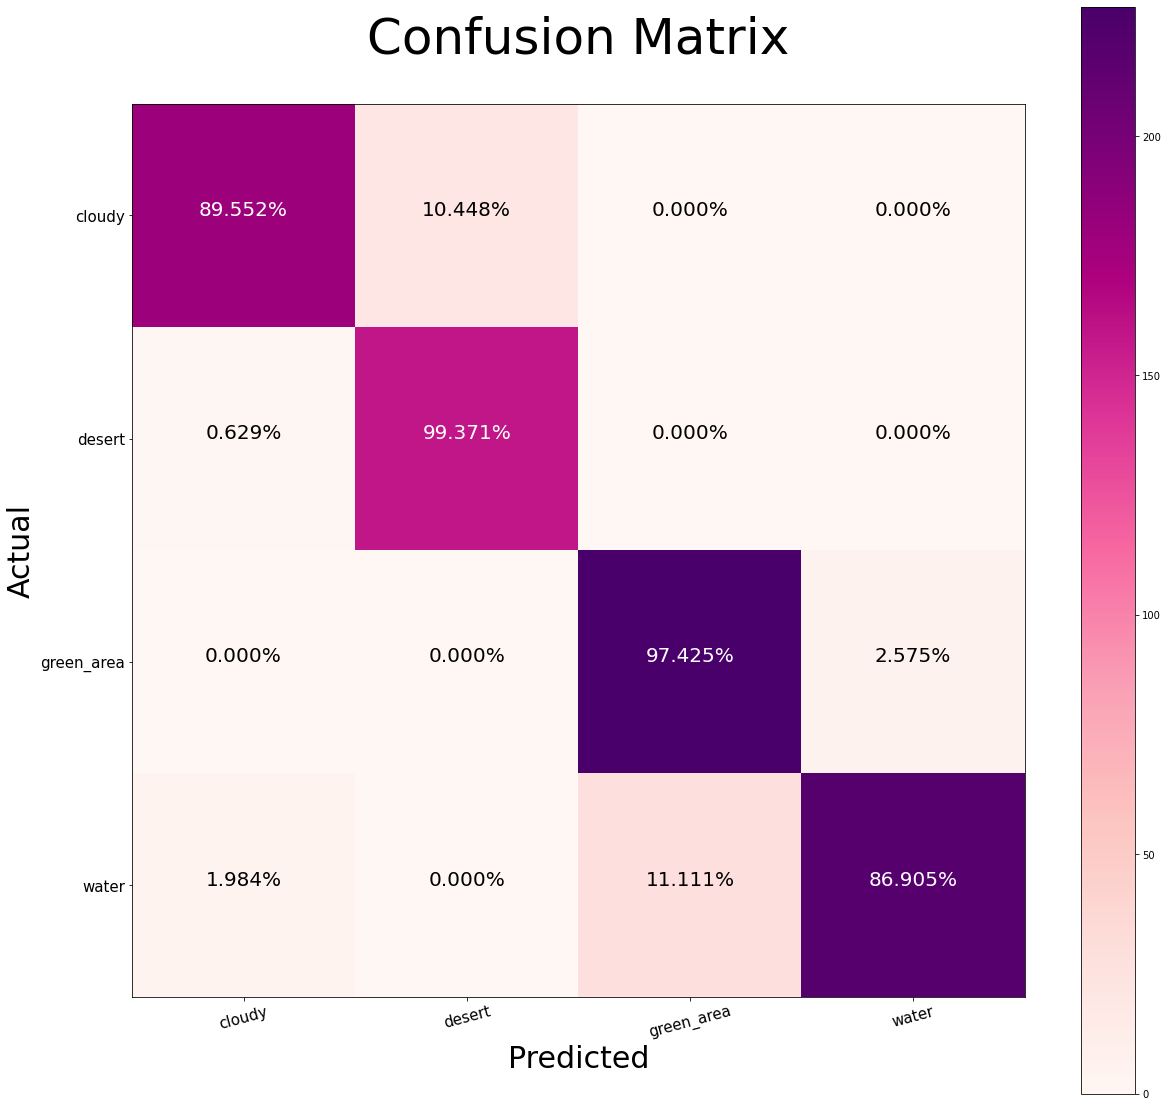

In [43]:
cm = confusion_matrix(y_labels, pred_classes)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0] # find the number of classes we're dealing with

# Plot the figure and make it pretty
fig, ax = plt.subplots(figsize=(20,20))
cax = ax.matshow(cm, cmap=plt.cm.RdPu) # colors will represent how 'correct' a class is, darker == better
fig.colorbar(cax)

# Are there a list of classes?
labels = class_names

plt.xticks(np.arange(len(class_names)), class_names, rotation=15, fontsize=15)
plt.yticks(np.arange(len(class_names)), class_names, fontsize=15)
plt.xlabel("Predicted", fontsize =30)
ax.xaxis.tick_bottom()
plt.ylabel("Actual", fontsize =30)
plt.title("Confusion Matrix", fontsize=50)

# Set the threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm_norm[i, j]*100:.3f}%",
            horizontalalignment="center",
            color="white" if cm_norm[i, j] > 0.5 else "black",
            size=20)

fig.savefig("confusion_matrix.png")

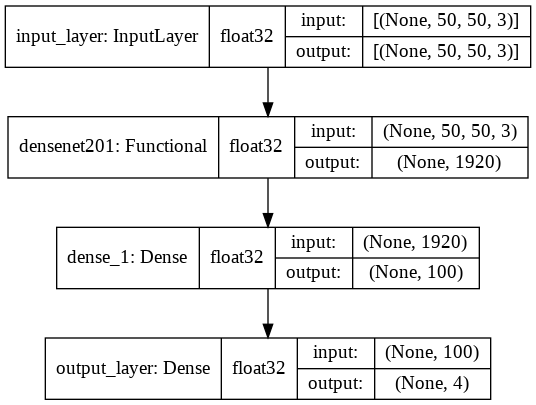

In [44]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None
)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.4184 to fit



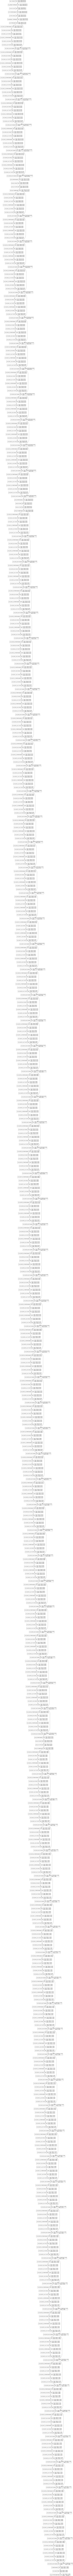

In [45]:
tf.keras.utils.plot_model(
    base_model, to_file='base_model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None
)

In [46]:
model.save("SatelliteClassificationByFivani")

INFO:tensorflow:Assets written to: SatelliteClassificationByFivani/assets
